# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [ ]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
BIT_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [5]:
# Fetch the Ethereum news articles
ETH_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
BIT_sentiments = []

for article in BIT_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BIT_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
BIT_df = pd.DataFrame(BIT_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
BIT_df = BIT_df[cols]

BIT_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
2,2020-11-05,"Two days ago, about $1 billion worth of bitcoi...",0.2263,0.049,0.000,0.951
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-11-06,"2018’s jokes are 2020’s reality. I’m speaking,...",0.2500,0.059,0.000,0.941


In [7]:
# Create the ethereum sentiment scores DataFrame
ETH_sentiments = []

for article in ETH_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETH_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ETH_df = pd.DataFrame(ETH_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ETH_df = ETH_df[cols]

ETH_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682


In [8]:
# Describe the Bitcoin Sentiment
BIT_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.171123,0.071361,0.030495,0.898134
std,0.421411,0.071529,0.058097,0.081708
min,-0.875000,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.850000
50%,0.177900,0.063000,0.000000,0.896000
75%,0.517100,0.124000,0.047000,0.959000
max,0.946800,0.318000,0.263000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ETH_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.232915,0.075821,0.019747,0.904453
std,0.371831,0.083126,0.041865,0.088239
min,-0.670500,0.000000,0.000000,0.626000
25%,0.000000,0.000000,0.000000,0.859500
50%,0.226300,0.074000,0.000000,0.912000
75%,0.502250,0.123000,0.000000,1.000000
max,0.946800,0.374000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH at 7.2%

Q: Which coin had the highest compound score?

A: Both had the same score of max compound 94.68%

Q. Which coin had the highest positive score?

A: Both have the same score at max pos 29.7%

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\16177\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\16177\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16177\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16177\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Expand the default stopwords list if necessary



In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    
    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    try:
        re_clean = regex.sub('', text)
    except:  
        print(text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

print(tokenizer(text))
tokens = (tokenizer(text))


['ethereum', 'cofounder', 'vitalik', 'buterin', 'recently', 'answered', 'number', 'community', 'question', 'part', 'ask', 'anything', 'ama', 'session', 'reddit', 'ama', 'hosted', 'ethereum', 'foundations', 'eth', 'char']


In [13]:
# Create a new tokens column for bitcoin


tokens_list = []


for text in BIT_df['text']:
    #print(text)
    tokens_list.append(tokenizer(text))
#print(tokens_list)

BIT_df['tokens'] = tokens_list
BIT_df.head()



,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
2,2020-11-05,"Two days ago, about $1 billion worth of bitcoi...",0.2263,0.049,0.000,0.951,"[two, day, ago, billion, worth, bitcoin, sat, ..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-11-06,"2018’s jokes are 2020’s reality. I’m speaking,...",0.2500,0.059,0.000,0.941,"[joke, reality, im, speaking, course, tesla, t..."


In [14]:
# Create a new tokens column for ethereum
tokens_list_ETH = []


for text in ETH_df['text']:
    #print(text)
    tokens_list_ETH.append(tokenizer(text))
#print(tokens_list)

ETH_df['tokens'] = tokens_list_ETH
ETH_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682,"[paypal, ha, launched, generosity, network, pl..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

N = 2
grams = ngrams(tokenizer(BIT_df.text.str.cat()), N)
Counter(grams).most_common(20)




[(('virtual', 'currency'), 12),
 (('york', 'reuters'), 11),
 (('charsby', 'reuters'), 10),
 (('reuters', 'bitcoin'), 10),
 (('charsfile', 'photo'), 9),
 (('charslondon', 'reuters'), 9),
 (('currency', 'bitcoin'), 7),
 (('bitcoin', 'seen'), 7),
 (('illustration', 'taken'), 7),
 (('march', 'reutersdado'), 7),
 (('digital', 'currency'), 7),
 (('highest', 'level'), 6),
 (('price', 'bitcoin'), 6),
 (('asset', 'manager'), 6),
 (('level', 'since'), 5),
 (('photo', 'representations'), 5),
 (('representations', 'virtual'), 5),
 (('seen', 'picture'), 5),
 (('picture', 'illustration'), 5),
 (('taken', 'taken'), 5)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ETH_df.text.str.cat()), N)
Counter(grams).most_common(20)



[(('deposit', 'contract'), 7),
 (('virtual', 'currency'), 6),
 (('reuters', 'bitcoin'), 6),
 (('ethereum', 'blockchain'), 6),
 (('york', 'reuters'), 5),
 (('decentralized', 'finance'), 5),
 (('finance', 'defi'), 5),
 (('charsfile', 'photo'), 4),
 (('seen', 'illustration'), 4),
 (('digital', 'currency'), 4),
 (('charsnovember', 'min'), 4),
 (('min', 'readopinions'), 4),
 (('readopinions', 'expressed'), 4),
 (('expressed', 'entrepreneur'), 4),
 (('entrepreneur', 'contributor'), 4),
 (('highest', 'level'), 4),
 (('btc', 'trading'), 4),
 (('trading', 'around'), 4),
 (('vitalik', 'buterin'), 4),
 (('ethereum', 'ended'), 4)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(BIT_df.text.str.cat())
BIT_WC = token_count(all_tokens, 10)
BIT_WC

[('bitcoin', 57),
 ('reuters', 43),
 ('currency', 23),
 ('photo', 18),
 ('cryptocurrency', 17),
 ('price', 17),
 ('asset', 17),
 ('year', 16),
 ('ha', 15),
 ('york', 15)]

In [39]:
# Get the top 10 words for Ethereum
all_tokens_ETH = tokenizer(ETH_df.text.str.cat())
ETH_WC = token_count(all_tokens_ETH, 10)
ETH_WC

[('ethereum', 45),
 ('bitcoin', 24),
 ('ha', 18),
 ('blockchain', 15),
 ('cryptocurrency', 13),
 ('reuters', 13),
 ('charsthe', 13),
 ('defi', 13),
 ('asset', 12),
 ('contract', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

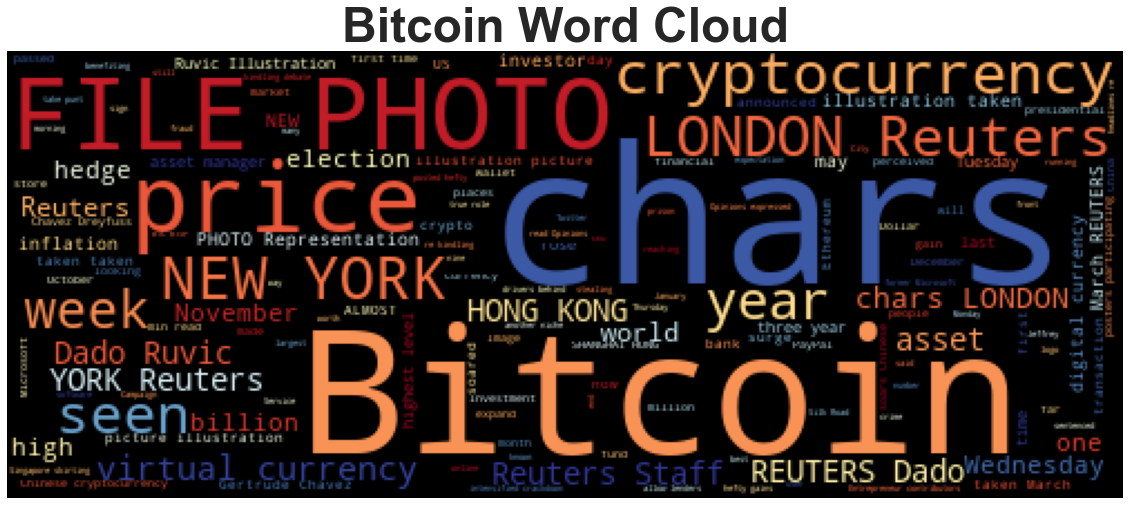

In [43]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(BIT_df.text.str.cat(), title="Bitcoin Word Cloud")  

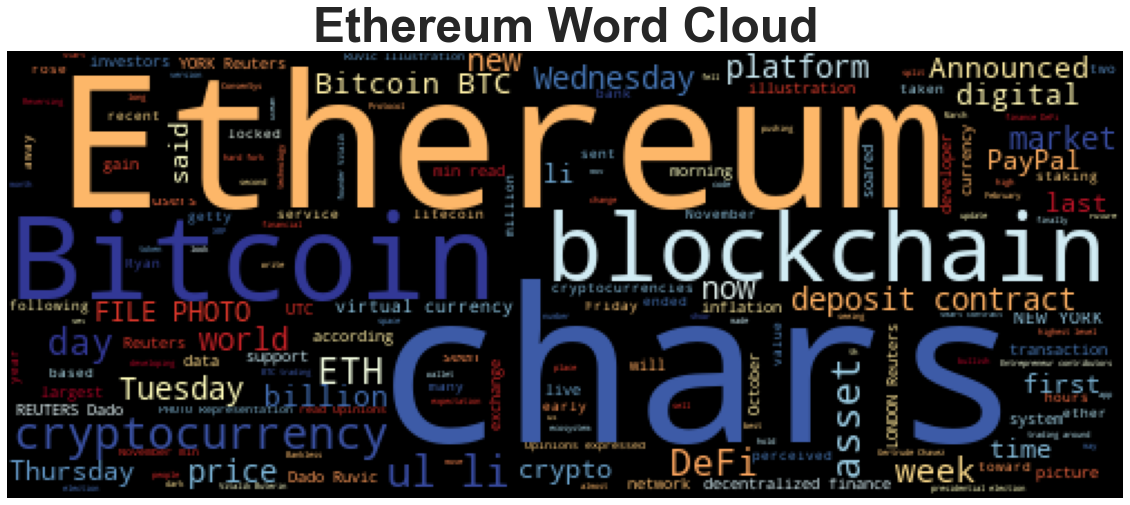

In [44]:
# Generate the Ethereum word cloud
wordcloud(ETH_df.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [46]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [48]:
# Concatenate all of the bitcoin text together
BIT_NER = BIT_df.text.str.cat()
BIT_NER

'A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft\'s online store. From 2016 to 2018, Volod… [+3307 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]2018’s jokes are 2020’s reality. I’m speaking, of course, about Tesla Tequila. Previously featured in an April Fool’s tweet from Elon Musk (pre

In [49]:
# Run the NER processor on all of the text
NER_processed = nlp(BIT_NER)

# Add a title to the document
NER_processed.user_data["title"] = "Bitcoin NER"



In [50]:
# Render the visualization
displacy.render(NER_processed, style='ent', jupyter=True)

In [51]:
# List all Entities
for ent in NER_processed.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
US GPE
first ORDINAL
US GPE
October DATE
days ago DATE
about $1 billion MONEY
bitcoin GPE
the Silk Road FAC
2013 DATE
one CARDINAL
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
chars]2018 ORG
2020 DATE
Tesla Tequila ORG
April DATE
Elon Musk ORG
Teslaquila WORK_OF_ART
U.S. GPE
Individual X WORK_OF_ART
chars]4 CARDINAL
4 CARDINAL
one CARDINAL
above $14,000 MONEY
Saturday DATE
morning TIME
first ORDINAL
January 2018 DATE
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
chars]1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this w

---

## Ethereum NER

In [52]:
# Concatenate all of the bitcoin text together
ETH_NER = ETH_df.text.str.cat()
ETH_NER

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just l

In [53]:
# Run the NER processor on all of the text
NER_processed = nlp(ETH_NER)

# Add a title to the document
NER_processed.user_data["title"] = "Ethereum NER"

In [54]:
# Render the visualization
displacy.render(NER_processed, style='ent', jupyter=True)

In [55]:
# List all Entities
for ent in NER_processed.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
the Generosity Network ORG
20,000 MONEY
the Reserve Bank of Australia ORG
Sydney GPE
Australia GPE
March 7, 2017 DATE
David Gray PERSON
World News ORG
Reuters ORG
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk WORK_OF_ART
early February this year DATE
last month DATE
October DATE
$24 million MONEY
8, 2020 DATE
5 min QUANTITY
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON
1 CARDINAL
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
YORK PERSON
Reuters ORG
Grayscale ORG
Wednesday DAT